In [ ]:
# ==================== Setup & Installations ====================
from google.colab import files

# Install Kaggle library
!pip install -q kaggle
!mkdir -p ~/.kaggle
files.upload()  # Upload your kaggle.json file

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip skin-cancer-mnist-ham10000.zip

# ==================== Imports ====================
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG19, DenseNet169
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, Multiply, GlobalAveragePooling2D, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import pickle

# ==================== Dataset Preparation ====================
IMG_SIZE = (224, 224)
base_skin_dir = "/content/"
df_meta = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

# Map image paths
imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))
}

# Label dictionary
lesion_type_dict = {
    'nv': 'Melanocytic nevi', 'mel': 'Melanoma', 'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma', 'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions', 'df': 'Dermatofibroma'
}

# Filter selected classes
df_meta['path'] = df_meta['image_id'].map(imageid_path_dict.get)
df_meta['cell_type'] = df_meta['dx'].map(lesion_type_dict.get)
classes = ['df', 'akiec', 'vasc']
df_meta = df_meta[df_meta['dx'].isin(classes)]
df_meta['cell_type_idx'] = pd.Categorical(df_meta['cell_type']).codes

# Load and preprocess images
def load_and_preprocess_image(path):
    img = load_img(path, target_size=IMG_SIZE)
    img = img_to_array(img) / 255.0
    return img

X = np.array([load_and_preprocess_image(path) for path in df_meta['path']])
y = df_meta['cell_type_idx'].values



Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_part_2/ISIC_0029342.jpg  
  inflating: h

<ipython-input-1-860e9c2fa526>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['cell_type_idx'] = pd.Categorical(df_meta['cell_type']).codes


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

📘 Starting training from epoch 0 to 100
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4956 - loss: 1.0349   
Epoch 1: val_loss improved from inf to 0.87047, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 134s 6s/step - accuracy: 0.4971 - loss: 1.0354 - val_accuracy: 0.6325 - val_loss: 0.8705 - learning_rate: 1.0000e-04
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.5971 - loss: 0.9384
Epoch 2: val_loss improved from 0.87047 to 0.81585, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5974 - loss: 0.9376 - val_accuracy: 0.6923 - val_loss: 0.8159 - learning_rate: 1.0000e-04
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6575 - loss: 0.8569
Epoch 3: val_loss improved from 0.81585 to 0.66892, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 710ms/step - accuracy: 0.6582 - loss: 0.8557 - val_accuracy: 0.7949 - val_loss: 0.6689 - learning_rate: 1.0000e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.6877 - loss: 0.7906
Epoch 4: val_loss improved from 0.66892 to 0.62950, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 599ms/step - accuracy: 0.6873 - loss: 0.7902 - val_accuracy: 0.7692 - val_loss: 0.6295 - learning_rate: 1.0000e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.7353 - loss: 0.6762
Epoch 5: val_loss improved from 0.62950 to 0.54978, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 664ms/step - accuracy: 0.7345 - loss: 0.6764 - val_accuracy: 0.7692 - val_loss: 0.5498 - learning_rate: 1.0000e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.7307 - loss: 0.6608
Epoch 6: val_loss improved from 0.54978 to 0.52485, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 702ms/step - accuracy: 0.7312 - loss: 0.6595 - val_accuracy: 0.7778 - val_loss: 0.5248 - learning_rate: 1.0000e-04
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.7341 - loss: 0.6196
Epoch 7: val_loss improved from 0.52485 to 0.43485, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 731ms/step - accuracy: 0.7360 - loss: 0.6166 - val_accuracy: 0.8205 - val_loss: 0.4349 - learning_rate: 1.0000e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.7934 - loss: 0.5641
Epoch 8: val_loss improved from 0.43485 to 0.42614, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 695ms/step - accuracy: 0.7923 - loss: 0.5654 - val_accuracy: 0.8120 - val_loss: 0.4261 - learning_rate: 1.0000e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.8072 - loss: 0.5451
Epoch 9: val_loss did not improve from 0.42614
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 612ms/step - accuracy: 0.8073 - loss: 0.5437 - val_accuracy: 0.8291 - val_loss: 0.4359 - learning_rate: 1.0000e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8170 - loss: 0.4878
Epoch 10: val_loss did not improve from 0.42614
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 709ms/step - accuracy: 0.8164 - loss: 0.4879 - val_accuracy: 0.8120 - val_loss: 0.4292 - learning_rate: 1.0000e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.8158 - loss: 0.4853
Epoch 11: val_loss did not improve from 0.42614
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 502ms/step - accuracy: 0.8157 - loss: 0.4856 - val_accuracy: 0.7607 - val_loss: 0.4726 - learning_rate: 1.0000e-04
Epoch 12/100

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 808ms/step - accuracy: 0.7999 - loss: 0.4708 - val_accuracy: 0.8547 - val_loss: 0.3631 - learning_rate: 2.0000e-05
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.8303 - loss: 0.4805
Epoch 13: val_loss did not improve from 0.36314
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 613ms/step - accuracy: 0.8294 - loss: 0.4808 - val_accuracy: 0.8376 - val_loss: 0.3877 - learning_rate: 2.0000e-05
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.8301 - loss: 0.4725
Epoch 14: val_loss improved from 0.36314 to 0.34368, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 817ms/step - accuracy: 0.8315 - loss: 0.4713 - val_accuracy: 0.8547 - val_loss: 0.3437 - learning_rate: 2.0000e-05
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8341 - loss: 0.4316
Epoch 15: val_loss did not improve from 0.34368
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 607ms/step - accuracy: 0.8341 - loss: 0.4325 - val_accuracy: 0.8547 - val_loss: 0.3562 - learning_rate: 2.0000e-05
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.8386 - loss: 0.4610
Epoch 16: val_loss did not improve from 0.34368
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 712ms/step - accuracy: 0.8381 - loss: 0.4603 - val_accuracy: 0.8376 - val_loss: 0.3975 - learning_rate: 2.0000e-05
Epoch 17/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.8314 - loss: 0.4159
Epoch 17: val_loss did not improve from 0.34368
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 579ms/step - accuracy: 0.8312 - loss: 0.4168 - val_accuracy: 0.8376 - val_loss: 0.3776 - learning_rate: 2.0000e-05
Epoch 18/1

15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 666ms/step - accuracy: 0.8299 - loss: 0.4406 - val_accuracy: 0.8632 - val_loss: 0.3425 - learning_rate: 4.0000e-06
Epoch 21/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.8572 - loss: 0.4082
Epoch 21: val_loss did not improve from 0.34248
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 577ms/step - accuracy: 0.8570 - loss: 0.4075 - val_accuracy: 0.8376 - val_loss: 0.3754 - learning_rate: 4.0000e-06
Epoch 22/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.8721 - loss: 0.4194
Epoch 22: val_loss did not improve from 0.34248
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 715ms/step - accuracy: 0.8703 - loss: 0.4213 - val_accuracy: 0.8462 - val_loss: 0.3890 - learning_rate: 4.0000e-06
Epoch 23/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8211 - loss: 0.4154
Epoch 23: val_loss improved from 0.34248 to 0.30699, saving model to best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 651ms/step - accuracy: 0.8211 - loss: 0.4161 - val_accuracy: 0.8718 - val_loss: 0.3070 - learning_rate: 4.0000e-06
Epoch 24/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.8469 - loss: 0.4104
Epoch 24: val_loss did not improve from 0.30699
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 602ms/step - accuracy: 0.8462 - loss: 0.4121 - val_accuracy: 0.8034 - val_loss: 0.4125 - learning_rate: 4.0000e-06
Epoch 25/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.8204 - loss: 0.4459
Epoch 25: val_loss did not improve from 0.30699
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 714ms/step - accuracy: 0.8215 - loss: 0.4444 - val_accuracy: 0.8376 - val_loss: 0.3744 - learning_rate: 4.0000e-06
Epoch 26/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.8097 - loss: 0.4650
Epoch 26: val_loss did not improve from 0.30699
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 583ms/step - accuracy: 0.8109 - loss: 0.4630 - val_accuracy: 0.8291 - val_loss: 0.3871 - learning_rate: 4.0000e-06
Epoch 27/10

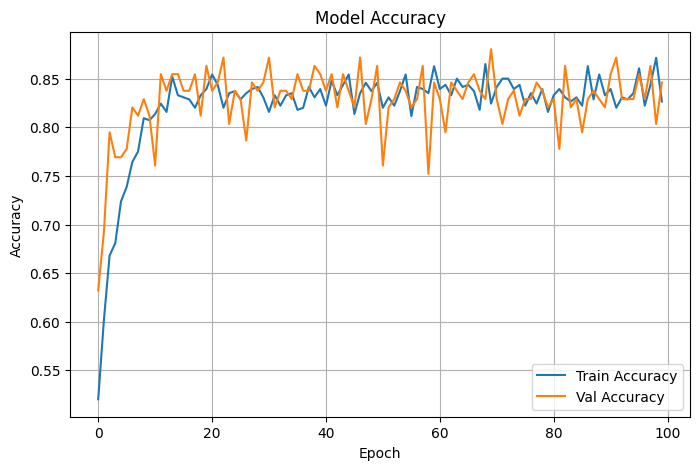

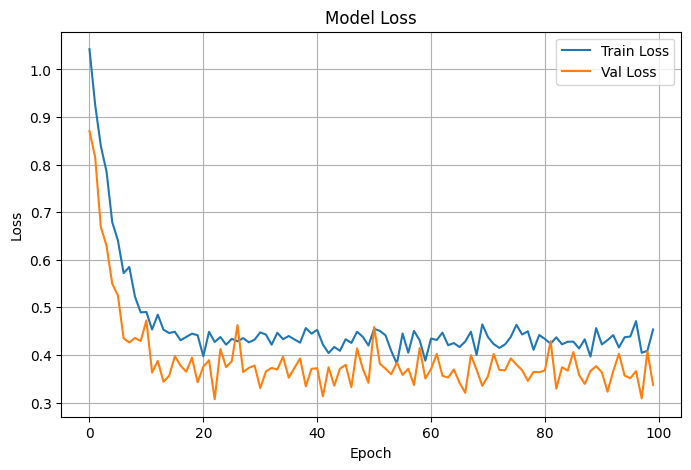

✅ Model saved successfully.


In [ ]:
# ==================== Train-Test Split ====================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

train_datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True
)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# ==================== Attention Mechanism ====================
def self_attention(inputs):
    attention = Conv2D(1, (1, 1), activation='sigmoid')(inputs)
    return Multiply()([inputs, attention])

# ==================== Model Architecture ====================
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg19.layers:
    layer.trainable = False
for layer in densenet169.layers:
    layer.trainable = False

vgg19_att = self_attention(vgg19.output)
densenet_att = self_attention(densenet169.output)

vgg19_feat = GlobalAveragePooling2D()(vgg19_att)
densenet_feat = GlobalAveragePooling2D()(densenet_att)

merged = Concatenate()([vgg19_feat, densenet_feat])
x = Dense(512, activation='relu')(merged)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=[vgg19.input, densenet169.input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.summary()

# ==================== Custom Dual Input Generator ====================
def dual_input_generator(generator):
    while True:
        x, y = next(generator)
        yield (x, x), y

# ==================== Wrap with tf.data.Dataset ====================
train_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(train_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: dual_input_generator(val_generator),
    output_signature=(
        (tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
         tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32)),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

# ==================== Checkpoints and Learning Rate Scheduling ====================
checkpoint_path = 'best_model.h5'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# ==================== Training Loop with Resume ====================
import pickle

history_file = 'train_history.pkl'

def load_history():
    try:
        with open(history_file, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        return {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

initial_epoch = len(load_history()['accuracy'])
total_epochs = 100
epochs_per_session = 100

while initial_epoch < total_epochs:
    print(f"\n📘 Starting training from epoch {initial_epoch} to {initial_epoch + epochs_per_session}")
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        epochs=initial_epoch + epochs_per_session,
        initial_epoch=initial_epoch,
        callbacks=[checkpoint, reduce_lr]
    )

    prev_history = load_history()
    for key in history.history:
        if key in prev_history:
            prev_history[key].extend(history.history[key])
        else:
            prev_history[key] = history.history[key]

    with open(history_file, 'wb') as f:
        pickle.dump(prev_history, f)

    initial_epoch += epochs_per_session
    print(f"✅ Completed {initial_epoch} epochs. You can now switch to another Colab account and resume training.")

# ==================== Evaluation ====================
val_loss, val_accuracy = model.evaluate(val_dataset, steps=len(val_generator))
print(f"🔍 Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# ==================== Plotting ====================
with open(history_file, 'rb') as f:
    final_history = pickle.load(f)

plt.figure(figsize=(8, 5))
plt.plot(final_history['accuracy'], label='Train Accuracy')
plt.plot(final_history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(final_history['loss'], label='Train Loss')
plt.plot(final_history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# ==================== Save Final Model ====================
model.save("hybrid_vgg19_densenet_attention_skin_cancer.h5")
print("✅ Model saved successfully.")
